In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

In [72]:
df_index = pd.read_json('./Database/combined_data_index.json', lines=True)
df_index['begin'] = pd.to_datetime(df_index['begin'])

df_index

,begin,open,close,high,low,value,volume,INDEX_TICK
0,2020-03-10,2502.70,2498.94,2661.63,2435.62,2.487326e+11,0,IMOEX
1,2020-03-11,2532.72,2492.88,2555.43,2457.36,1.410248e+11,0,IMOEX
2,2020-03-12,2413.02,2286.40,2413.02,2277.58,1.730221e+11,0,IMOEX
3,2020-03-13,2277.66,2316.38,2418.15,2275.16,1.844690e+11,0,IMOEX
4,2020-03-16,2297.04,2266.90,2301.19,2179.12,1.407042e+11,0,IMOEX
...,...,...,...,...,...,...,...,...
11730,2025-03-04,11243.98,11448.51,11448.51,11243.98,4.506705e+10,0,MOEXFN
11731,2025-03-05,11437.95,11518.26,11526.19,11392.40,3.115445e+10,0,MOEXFN
11732,2025-03-06,11464.25,11305.81,11464.25,11226.80,2.507349e+10,0,MOEXFN
11733,2025-03-07,11386.05,11152.99,11485.59,11121.50,6.548457e+10,0,MOEXFN


<ipython-input-55-2b3056fedbd4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1['low'] = filtered_data['high']


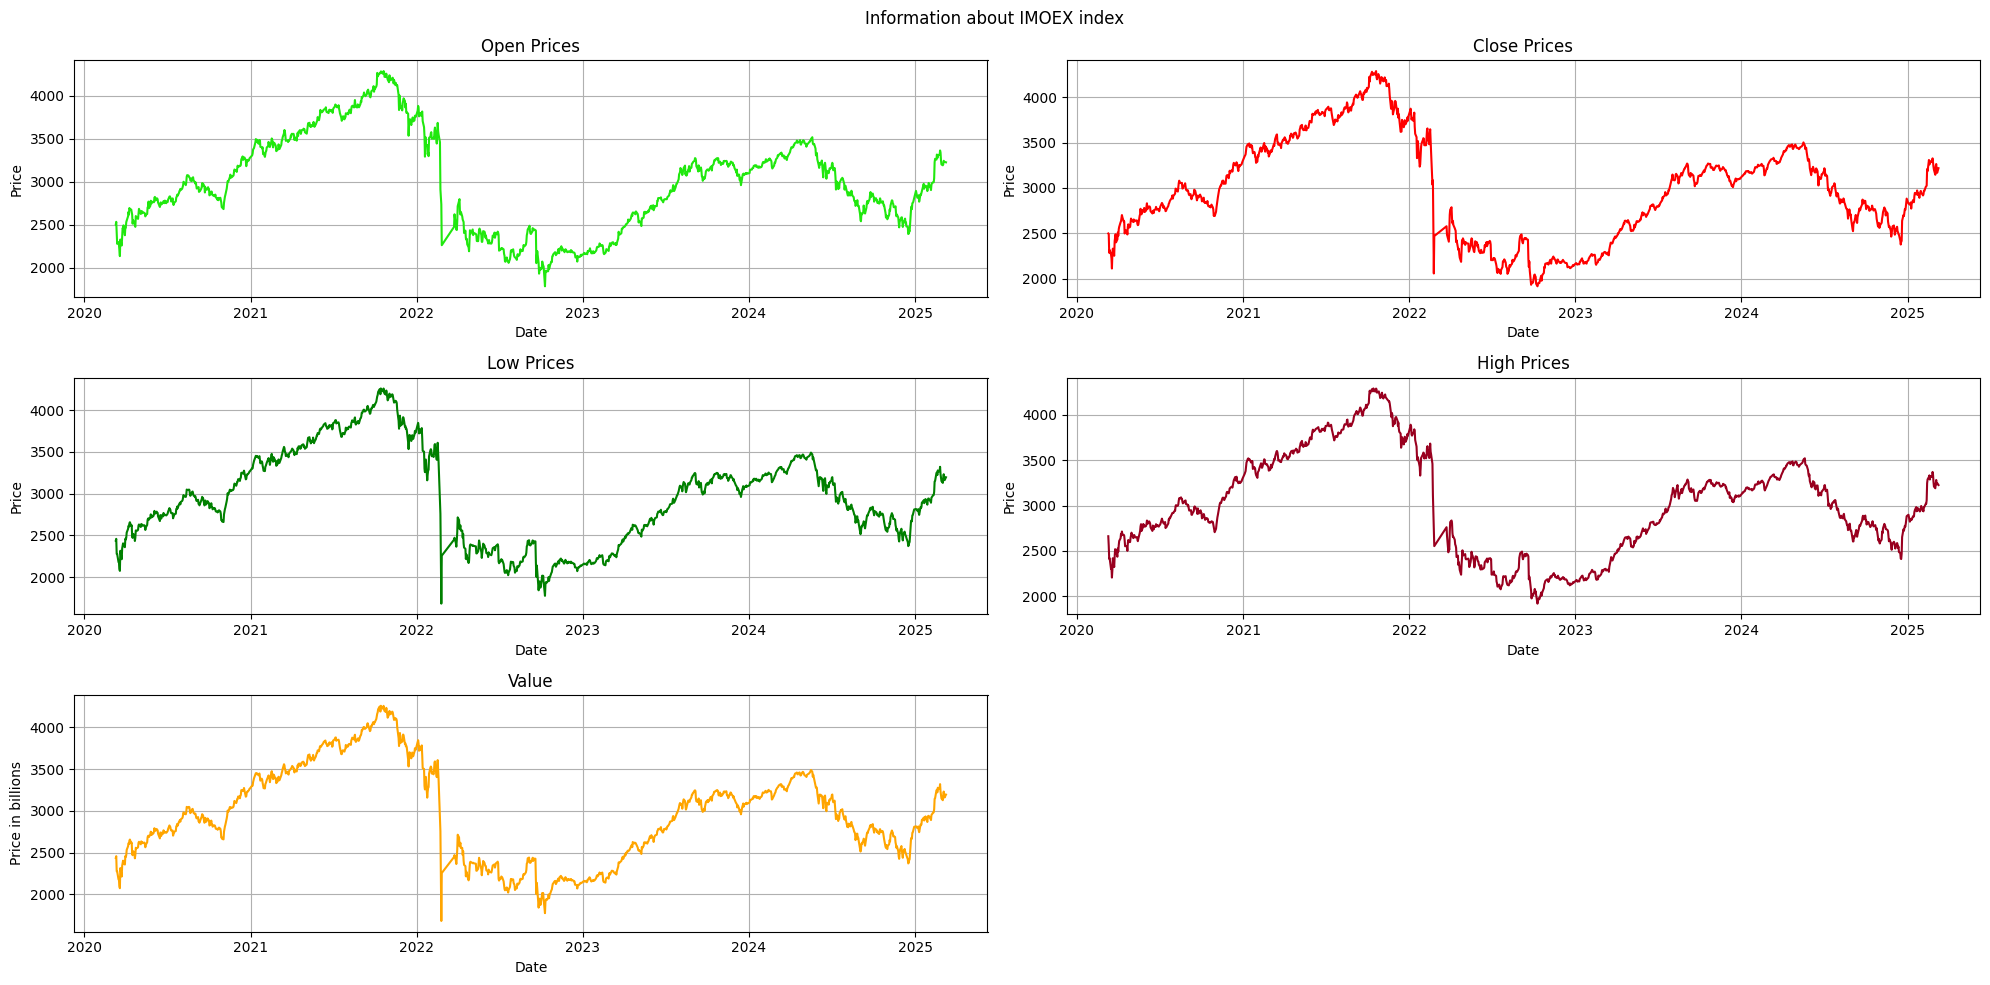

In [55]:
ticker1 = 'IMOEX'
filtered_data = df_index[df_index['INDEX_TICK'] == ticker1]
fig, axs = plt.subplots(3, 2, figsize=(20, 10))

# plotting graph of open prices
axs[0, 0].plot(filtered_data['begin'], filtered_data['open'], color='#20e80e')
axs[0, 0].set_title('Open Prices')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price')
axs[0, 0].grid()

# plotting graph of close prices
axs[0, 1].plot(filtered_data['begin'], filtered_data['close'], color='red')
axs[0, 1].set_title('Close Prices')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price')
axs[0, 1].grid()

# plotting graph of low prices
filtered_data['low'] = filtered_data['high']
axs[1, 0].plot(filtered_data['begin'], filtered_data['low'], color='green')
axs[1, 0].set_title('Low Prices')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price')
axs[1, 0].grid()

# plotting graph of high prices
axs[1, 1].plot(filtered_data['begin'], filtered_data['high'], color='#99001f')
axs[1, 1].set_title('High Prices')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price')
axs[1, 1].grid()

axs[2,0].plot(filtered_data['begin'], filtered_data['low'], color = 'orange')
axs[2,0].set_title('Value')
axs[2,0].set_xlabel('Date')
axs[2,0].set_ylabel('Price in billions')
axs[2,0].grid()
axs[2,1].axis('off')

fig.suptitle(f"Information about {ticker1} index")
plt.tight_layout()
plt.show()

In [56]:
# choosing the necessary ticker
ticker1 = 'IMOEX'

def plot_data(start, end):
  filtered_data = df_index[df_index['INDEX_TICK'] == ticker1]
  plt.figure(figsize = (20,10))
  plt.plot(filtered_data['begin'][start:end], filtered_data['high'][start:end], color='blue')
  plt.plot(filtered_data['begin'][start:end], filtered_data['low'][start:end], color='green')
  plt.autoscale(enable=True, axis='both', tight=True)
  plt.grid(True)
  plt.show()

interact(plot_data, start=(0, 900), end=(100, 1000))

interactive(children=(IntSlider(value=450, description='start', max=900), IntSlider(value=550, description='en…

<function __main__.plot_data(start, end)>

In [57]:
# choosing the necessary ticker
ticker1 = 'IMOEX'
ticker2 = 'MOEXBC'

def plot_data(start, end):
  filtered_data1 = df_index[df_index['INDEX_TICK'] == ticker1]
  filtered_data2 = df_index[df_index['INDEX_TICK'] == ticker2]
  plt.figure(figsize = (20,10))
  plt.plot(filtered_data1['begin'][start:end], filtered_data1['value'][start:end], color='blue', alpha=0.6)
  plt.plot(filtered_data2['begin'][start:end], filtered_data2['value'][start:end], color='green', alpha=0.7)
  plt.autoscale(enable=True, axis='both', tight=True)
  plt.grid(True)
  plt.show()

interact(plot_data, start=(0, 900), end=(100, 1000))

interactive(children=(IntSlider(value=450, description='start', max=900), IntSlider(value=550, description='en…

<function __main__.plot_data(start, end)>

<BarContainer object of 10 artists>

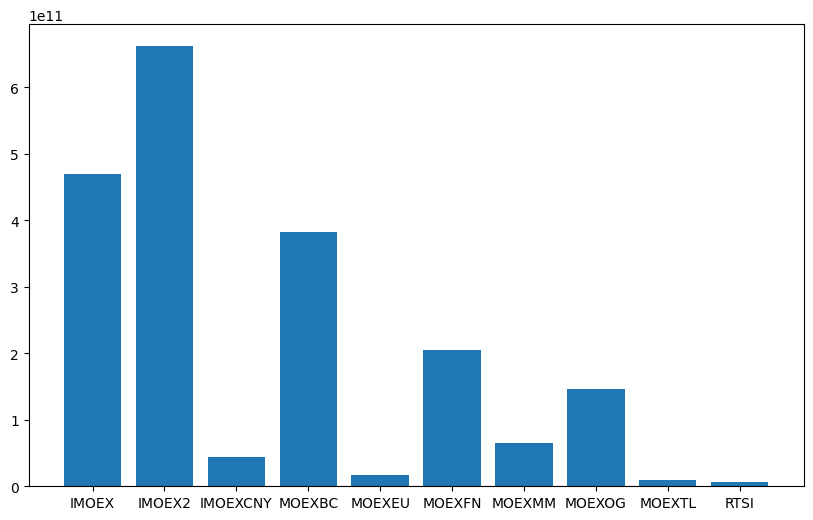

In [76]:
df_max = df_index.groupby('INDEX_TICK')['value'].max().reset_index()
df_max.columns = ['INDEX_TICK', 'value']
plt.figure(figsize = (10,6))
plt.bar(df_max['INDEX_TICK'], df_max['value'])

<BarContainer object of 8 artists>

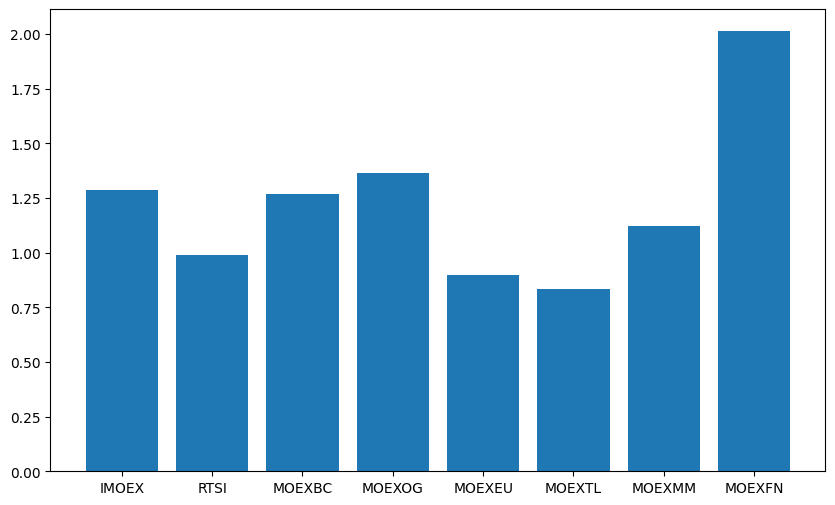

In [96]:
df_start = df_index[df_index['begin'] == '2020-03-10']
df_end = df_index[df_index['begin'] == '2025-03-10']
df_grow = pd.DataFrame(columns=['INDEX_TICK', 'grow_per'])
for i in range (len(df_start['begin'])):
  ticket = df_start.iloc[i]['INDEX_TICK']
  df_grow.loc[i] = [ticket, df_end[df_end['INDEX_TICK'] == ticket]['close'].values[0]/df_start.iloc[i]['open']]
plt.figure(figsize=(10,6))
plt.bar(df_grow['INDEX_TICK'],df_grow['grow_per'])